# Clustering with KMeans

- Easy to use and iterate over

- We manually determine number of clusters

- Assumption made that the clusters will be circular

- Scale your data! KMeans uses distance

- .cluster_centers_, .inertia_

In [1]:
import pandas as pd
import numpy as np
import new_lib as nl

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
url = nl.get_db_url('mall_customers')

In [3]:
query = '''SELECT * FROM customers'''

In [4]:
mall = pd.read_sql(query, url)
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
seed = 77
train, val_test = train_test_split(mall, train_size = 0.7, random_state = seed)

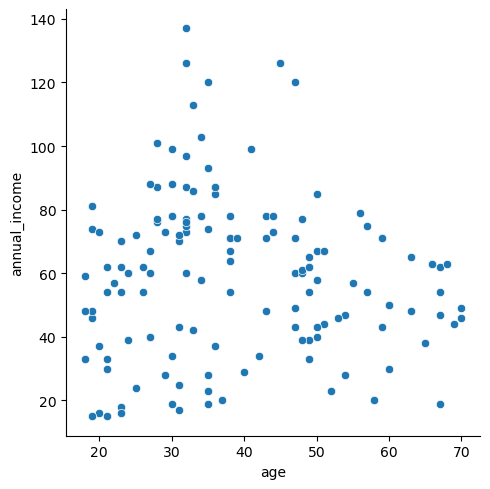

In [6]:
sns.relplot(data = train, x='age', y = 'annual_income')

In [7]:
X = train[['age', 'annual_income']]

In [8]:
kmeans = KMeans(n_clusters = 3, random_state = seed)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=77)

In [9]:
kmeans.predict(X)

array([0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 0,
       0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0,
       2, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

In [10]:
X['uscaled_clusters'] = kmeans.predict(X)

X.head()

/var/folders/hj/kp1r0j7515q27kbqjjy_89fm0000gn/T/ipykernel_72314/580157484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['uscaled_clusters'] = kmeans.predict(X)


,age,annual_income,uscaled_clusters
168,36,87,0
158,34,78,0
147,32,77,0
14,37,20,1
96,47,60,2


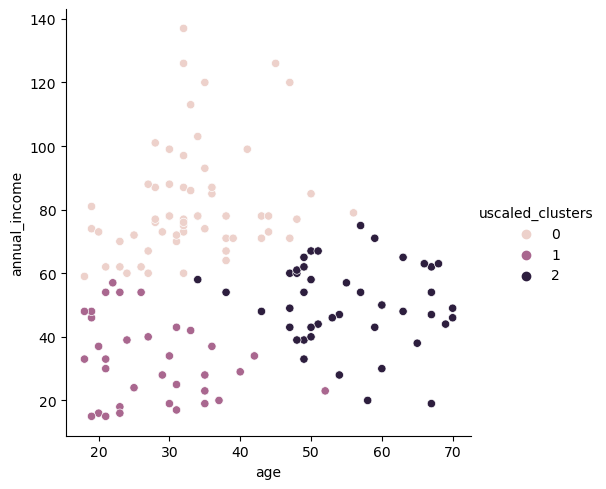

In [11]:
sns.relplot(data = X, x='age', y='annual_income', hue = 'uscaled_clusters')
plt.show()

In [12]:
mm_scaler = MinMaxScaler()

X[['age', 'annual_income']] = mm_scaler.fit_transform(X[['age', 'annual_income']])
X

/var/folders/hj/kp1r0j7515q27kbqjjy_89fm0000gn/T/ipykernel_72314/2785603896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age', 'annual_income']] = mm_scaler.fit_transform(X[['age', 'annual_income']])


,age,annual_income,uscaled_clusters
168,0.346154,0.590164,0
158,0.307692,0.516393,0
147,0.269231,0.508197,0
14,0.365385,0.040984,1
96,0.557692,0.368852,2
...,...,...,...
159,0.230769,0.516393,0
152,0.500000,0.516393,0
37,0.230769,0.155738,1
84,0.057692,0.319672,1


In [15]:
kmeans_scale = KMeans(n_clusters = 3, random_state  = seed)
kmeans_scale.fit(X[['age', 'annual_income']])

KMeans(n_clusters=3, random_state=77)

In [18]:
kmeans_scale.predict(X[['age', 'annual_income']])

array([2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2,
       2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 2,
       1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1,
       0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2,
       1, 2, 2, 2, 2, 0, 0, 0], dtype=int32)

In [22]:
X['scaled_clusters'] = kmeans_scale.predict(X[['age', 'annual_income']])
X.head()

/var/folders/hj/kp1r0j7515q27kbqjjy_89fm0000gn/T/ipykernel_72314/2183503335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['scaled_clusters'] = kmeans_scale.predict(X[['age', 'annual_income']])


,age,annual_income,uscaled_clusters,scaled_clusters
168,0.346154,0.590164,0,2
158,0.307692,0.516393,0,2
147,0.269231,0.508197,0,2
14,0.365385,0.040984,1,0
96,0.557692,0.368852,2,1


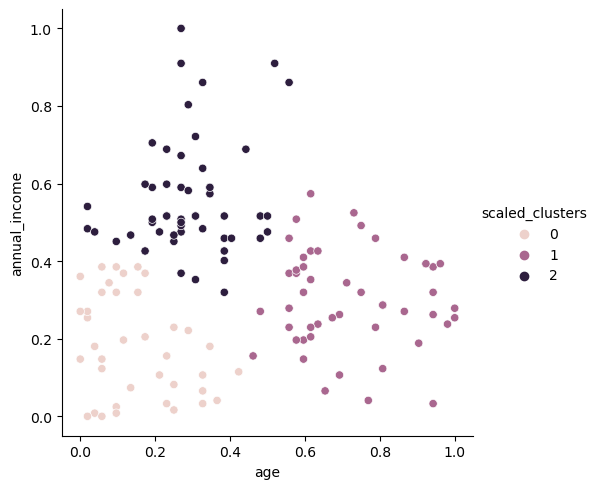

In [23]:
sns.relplot(data = X, x='age', y='annual_income', hue = 'scaled_clusters')
plt.show()

In [24]:
kmeans_scale.cluster_centers_

array([[0.15080972, 0.18032787],
       [0.72038462, 0.30245902],
       [0.29068047, 0.56179067]])

In [25]:
kmeans_scale.inertia_

4.952019441986687

In [27]:
inertia = []
for n in range(1,11):
    kmeans= KMeans(n_clusters = n, random_state = seed)
    kmeans.fit(X[['age', 'annual_income']])
    inertia.append(kmeans.inertia_)
    
inertia

[16.565303570917436,
 8.566910473066477,
 4.952019441986687,
 3.949008195555582,
 3.039364825407112,
 2.413437662640371,
 1.9415269354540285,
 1.6579223759518382,
 1.4986102879378083,
 1.357536732377858]

In [28]:
pd.DataFrame({'n_clusters': list(range(1,11)), 'inertia': inertia})

,n_clusters,inertia
0,1,16.565304
1,2,8.566910
2,3,4.952019
3,4,3.949008
4,5,3.039365
5,6,2.413438
6,7,1.941527
7,8,1.657922
8,9,1.498610
9,10,1.357537
